In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

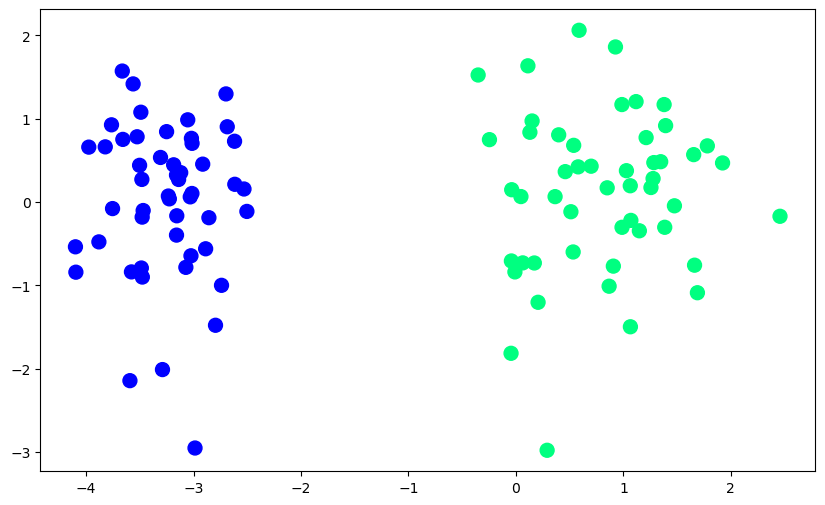

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

# Using Perceptron Trick

In [5]:
def perceptron(X, y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0], weights[1:]

In [6]:
def step(z):
    return 1 if z > 0 else 0

In [7]:
intercept_, coef_ = perceptron(X, y)

In [8]:
print(coef_)
print(intercept_)

[1.05343617 0.2221512 ]
1.3000000000000003


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

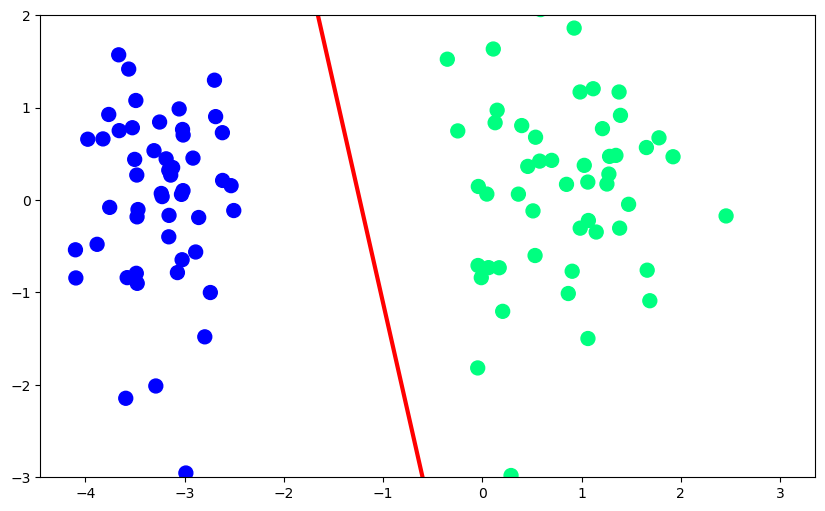

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color="red",linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter",s=100)
plt.ylim(-3,2)

## Applying Logistic Regression (Sigmoid Function is automatically handled)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [14]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

In [15]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m*x_input +  b

(-3.0, 2.0)

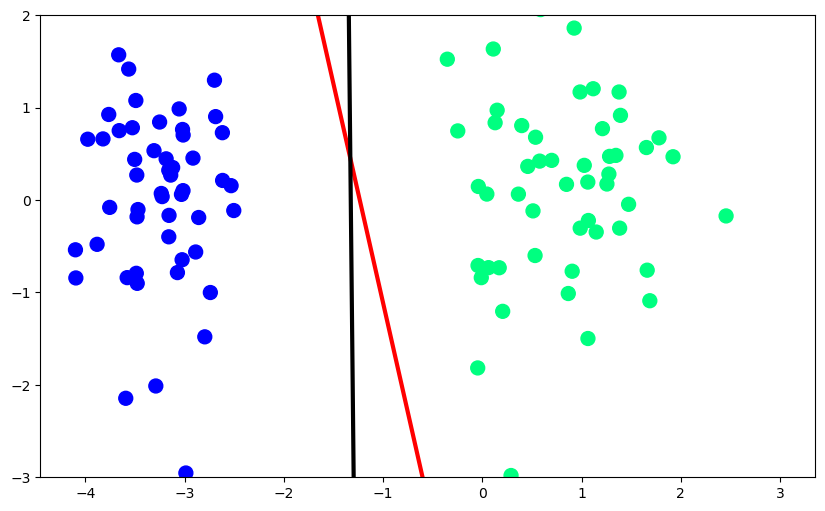

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color="red",linewidth=3)
plt.plot(x_input1, y_input1, color="black",linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter",s=100)
plt.ylim(-3,2)

## Apply Logistic Regression on Iris Dataset

In [17]:
df = pd.read_csv('Iris.csv')

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.shape

(150, 6)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [22]:
df = df[['SepalLengthCm', 'PetalLengthCm', 'Species']]

In [23]:
df.head()

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [24]:
df.shape

(150, 3)

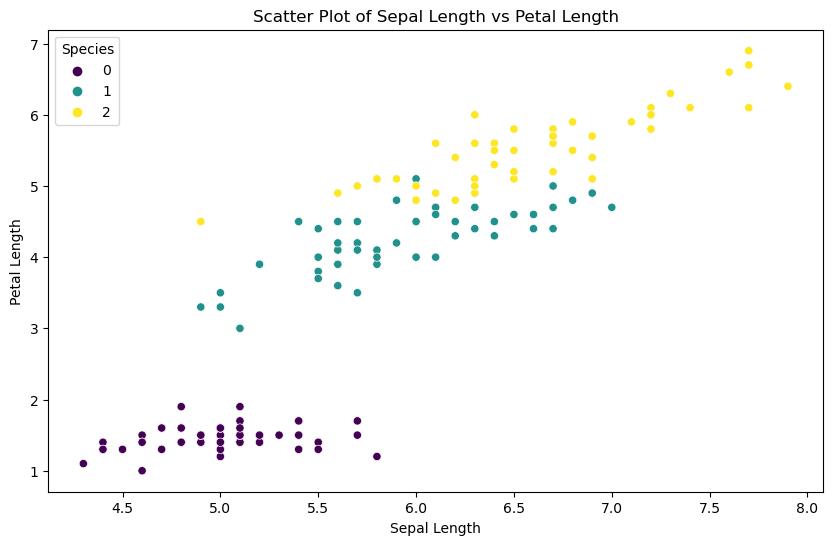

In [25]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.legend(title='Species')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Predict probabilities
probabilities = lr.predict_proba(X)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Probabilities", probabilities)

Accuracy Score:  1.0
Probabilities [[9.69462382e-01 3.05374021e-02 2.15953438e-07]
 [9.73692347e-01 2.63074351e-02 2.17812543e-07]
 [9.82350594e-01 1.76492876e-02 1.18616597e-07]
 [9.73060574e-01 2.69390189e-02 4.07533307e-07]
 [9.71653865e-01 2.83459176e-02 2.16898589e-07]
 [9.21573961e-01 7.84247253e-02 1.31357190e-06]
 [9.78987776e-01 2.10120033e-02 2.20387193e-07]
 [9.63734566e-01 3.62650335e-02 4.00236535e-07]
 [9.81922909e-01 1.80768689e-02 2.21982351e-07]
 [9.66322808e-01 3.36767901e-02 4.02158737e-07]
 [9.51341434e-01 4.86581739e-02 3.91770533e-07]
 [9.60030289e-01 3.99689662e-02 7.44886919e-07]
 [9.75587915e-01 2.44118659e-02 2.18697353e-07]
 [9.92118048e-01 7.88191696e-03 3.49042203e-08]
 [9.68623194e-01 3.13767445e-02 6.14248116e-08]
 [9.39509144e-01 6.04904711e-02 3.84457566e-07]
 [9.70175847e-01 2.98240375e-02 1.15429686e-07]
 [9.69462382e-01 3.05374021e-02 2.15953438e-07]
 [9.03239514e-01 9.67592069e-02 1.27931834e-06]
 [9.60955442e-01 3.90441600e-02 3.98241541e-07]
 [9.2

In [31]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


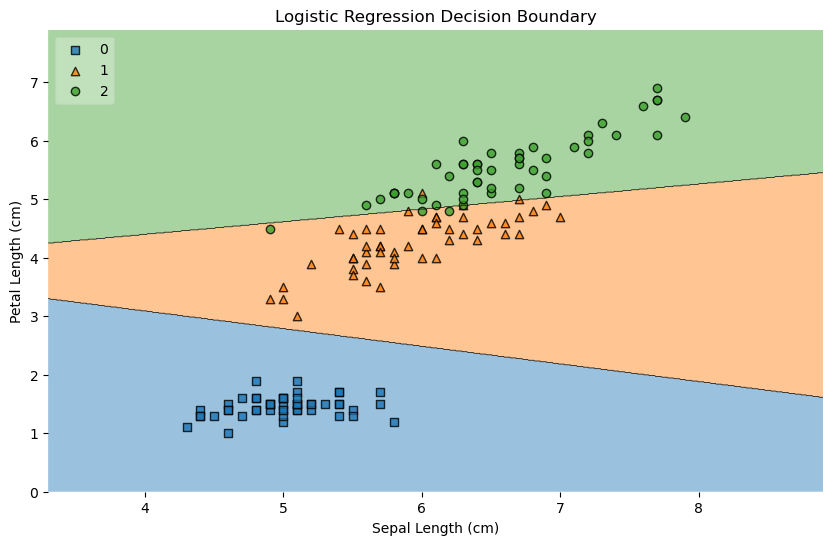

In [32]:
# Plot decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X.values, y.values, clf=lr, legend=2)

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Logistic Regression Decision Boundary')
plt.show()